<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(3_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.6'

In [6]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [7]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.158568,78.459767,92.054590,4015.537420,4263.210344,478.576574,3784.633771
1,0.0,1.0,99.781382,67.039835,68.180778,-2546.213703,-2301.211709,-292.919898,-2008.291810
2,0.0,2.0,77.625907,32.425156,52.656939,176.394743,349.102745,-68.499322,417.602068
3,0.0,3.0,97.142909,62.771373,99.887887,374.524759,644.326929,400.985486,243.341443
4,0.0,4.0,87.793125,23.799412,58.696489,167.185409,347.474435,-1.871793,349.346229
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.461905,68.606921,65.898577,-2198.950913,-1985.983509,348.184461,-2334.167970
119996,999.0,116.0,74.832705,62.138978,78.440270,-607.856429,-382.444475,668.799937,-1051.244413
119997,999.0,117.0,92.008215,88.754348,21.719249,4868.785217,5081.267029,-334.034452,5415.301481
119998,999.0,118.0,46.098617,50.343236,77.118276,-857.548492,-673.988363,334.488211,-1008.476574


In [8]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.158568,78.459767,92.054590,4015.537420,4263.210344,478.576574,3784.633771
1,0.0,1.0,99.781382,67.039835,68.180778,-2546.213703,-2301.211709,-292.919898,-2008.291810
2,0.0,2.0,77.625907,32.425156,52.656939,176.394743,349.102745,-68.499322,417.602068
3,0.0,3.0,97.142909,62.771373,99.887887,374.524759,644.326929,400.985486,243.341443
4,0.0,4.0,87.793125,23.799412,58.696489,167.185409,347.474435,-1.871793,349.346229
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.461905,68.606921,65.898577,-2198.950913,-1985.983509,348.184461,-2334.167970
119996,999.0,116.0,74.832705,62.138978,78.440270,-607.856429,-382.444475,668.799937,-1051.244413
119997,999.0,117.0,92.008215,88.754348,21.719249,4868.785217,5081.267029,-334.034452,5415.301481
119998,999.0,118.0,46.098617,50.343236,77.118276,-857.548492,-673.988363,334.488211,-1008.476574


In [9]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    67.158568  78.459767  ...  478.576574  3784.633771
      1.0    99.781382  67.039835  ... -292.919898 -2008.291810
      2.0    77.625907  32.425156  ...  -68.499322   417.602068
      3.0    97.142909  62.771373  ...  400.985486   243.341443
      4.0    87.793125  23.799412  ...   -1.871793   349.346229
...                ...        ...  ...         ...          ...
999.0 115.0  68.461905  68.606921  ...  348.184461 -2334.167970
      116.0  74.832705  62.138978  ...  668.799937 -1051.244413
      117.0  92.008215  88.754348  ... -334.034452  5415.301481
      118.0  46.098617  50.343236  ...  334.488211 -1008.476574
      119.0  45.045532  32.136823  ...  -29.156336   216.019987

[120000 rows x 7 columns]

In [10]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    67.158568  78.459767  ...  478.576574  3784.633771
      1.0    99.781382  67.039835  ... -292.919898 -2008.291810
      2.0    77.625907  32.425156  ...  -68.499322   417.602068
      3.0    97.142909  62.771373  ...  400.985486   243.341443
      4.0    87.793125  23.799412  ...   -1.871793   349.346229
...                ...        ...  ...         ...          ...
999.0 115.0  68.461905  68.606921  ...  348.184461 -2334.167970
      116.0  74.832705  62.138978  ...  668.799937 -1051.244413
      117.0  92.008215  88.754348  ... -334.034452  5415.301481
      118.0  46.098617  50.343236  ...  334.488211 -1008.476574
      119.0  45.045532  32.136823  ...  -29.156336   216.019987

[120000 rows x 7 columns]

In [11]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.158568,78.459767,92.054590,4015.537420,4263.210344,478.576574,3784.633771
1,0.0,1.0,99.781382,67.039835,68.180778,-2546.213703,-2301.211709,-292.919898,-2008.291810
2,0.0,2.0,77.625907,32.425156,52.656939,176.394743,349.102745,-68.499322,417.602068
3,0.0,3.0,97.142909,62.771373,99.887887,374.524759,644.326929,400.985486,243.341443
4,0.0,4.0,87.793125,23.799412,58.696489,167.185409,347.474435,-1.871793,349.346229
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.461905,68.606921,65.898577,-2198.950913,-1985.983509,348.184461,-2334.167970
119996,999.0,116.0,74.832705,62.138978,78.440270,-607.856429,-382.444475,668.799937,-1051.244413
119997,999.0,117.0,92.008215,88.754348,21.719249,4868.785217,5081.267029,-334.034452,5415.301481
119998,999.0,118.0,46.098617,50.343236,77.118276,-857.548492,-673.988363,334.488211,-1008.476574


In [12]:
table.set_index(['rep', 'index'], inplace=True)

In [13]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    67.158568  78.459767  ...  478.576574  3784.633771
      1.0    99.781382  67.039835  ... -292.919898 -2008.291810
      2.0    77.625907  32.425156  ...  -68.499322   417.602068
      3.0    97.142909  62.771373  ...  400.985486   243.341443
      4.0    87.793125  23.799412  ...   -1.871793   349.346229
...                ...        ...  ...         ...          ...
999.0 115.0  68.461905  68.606921  ...  348.184461 -2334.167970
      116.0  74.832705  62.138978  ...  668.799937 -1051.244413
      117.0  92.008215  88.754348  ... -334.034452  5415.301481
      118.0  46.098617  50.343236  ...  334.488211 -1008.476574
      119.0  45.045532  32.136823  ...  -29.156336   216.019987

[120000 rows x 7 columns]

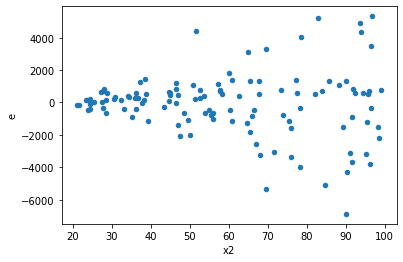

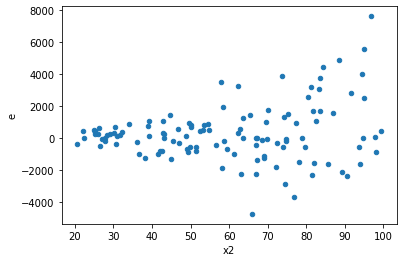

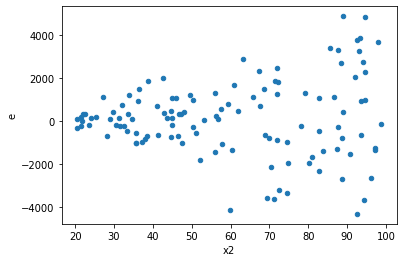

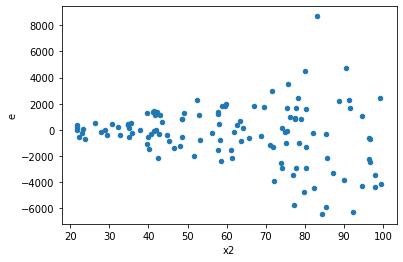

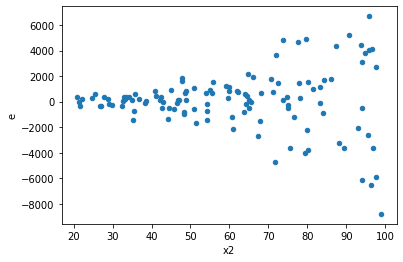

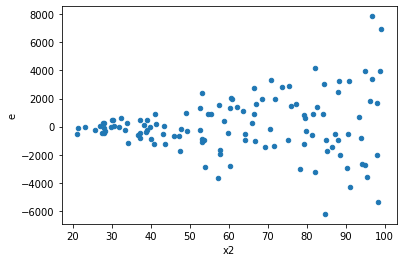

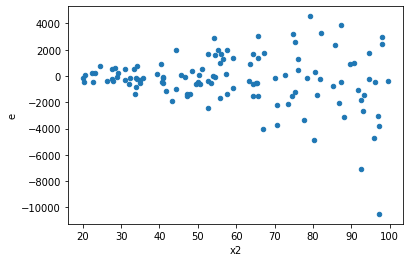

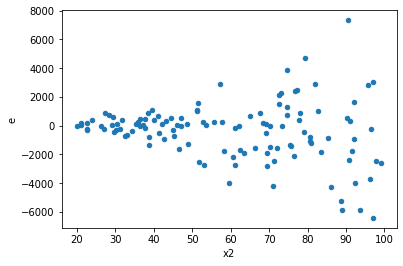

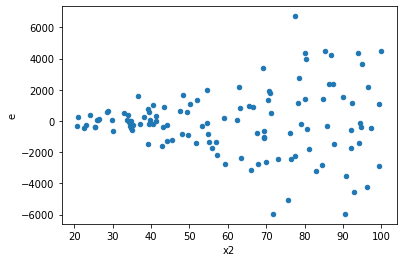

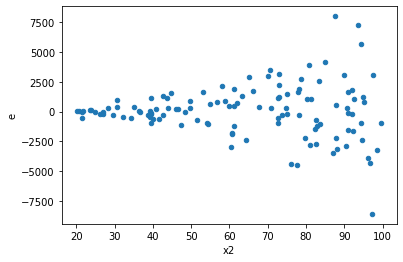

In [14]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [15]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,24546007.100652777,302141640.73979545,545466.8244589505,6714258.683106566,12.309197153770901,4.263256414560601e-14,0.9999999999999787,2.1316282072803006e-14,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,18809009.17669312,227279297.82576704,417977.98170429154,5050651.062794823,12.083533783767649,6.084022174945858e-14,0.9999999999999696,3.042011087472929e-14,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,20703554.417910837,251664633.3194971,460078.98706468527,5592547.407099936,12.15562450000275,5.440092820663267e-14,0.9999999999999728,2.7200464103316335e-14,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,39492019.758826,456443493.33000267,877600.4390850223,10143188.740666727,11.557866528920515,1.4277468096679513e-13,0.9999999999999286,7.138734048339757e-14,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,22609685.291778978,585523090.0339866,502437.45092842175,13011624.22297748,25.897003097468428,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,23942086.102914605,396611667.3572869,532046.3578425468,8813592.607939709,16.565459904055942,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,22129603.783352137,369813057.76539016,491768.9729633808,8218067.950342003,16.711237190952172,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,14433436.299269723,370635262.429539,320743.0288726605,8236339.165100867,25.67893429843119,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,22360184.568981625,404781481.1699723,496892.9904218139,8995144.025999384,18.102779067910337,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,24546007.100652777,302141640.73979545,545466.8244589505,6714258.683106566,12.309197153770901,4.263256414560601e-14,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,18809009.17669312,227279297.82576704,417977.98170429154,5050651.062794823,12.083533783767649,6.084022174945858e-14,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,20703554.417910837,251664633.3194971,460078.98706468527,5592547.407099936,12.15562450000275,5.440092820663267e-14,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,39492019.758826,456443493.33000267,877600.4390850223,10143188.740666727,11.557866528920515,1.4277468096679513e-13,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,22609685.291778978,585523090.0339866,502437.45092842175,13011624.22297748,25.897003097468428,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,23942086.102914605,396611667.3572869,532046.3578425468,8813592.607939709,16.565459904055942,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,22129603.783352137,369813057.76539016,491768.9729633808,8218067.950342003,16.711237190952172,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,14433436.299269723,370635262.429539,320743.0288726605,8236339.165100867,25.67893429843119,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,22360184.568981625,404781481.1699723,496892.9904218139,8995144.025999384,18.102779067910337,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64